# OpenCV

OpenCV is computer vision library that is mainly used for real-time computer vision. Originally developed by Intel. It was first released in 2000 and is written in C/C++. Most of this code and examples provided are from the LinkedIn course OpenCV fo

In python, OpenCV converts all of it's array structures to and from Numpy arrays. The other libraries that use numpy are Matplotlib and Scipy. Therefore, these libraries can also be used seamlessly with OpenCv in python. 

To install OpenCV. First create a virtual environment in python using the command below. Note that envname is the virtual environment that you choose and x is the python version. I am writing this when I have installed python 3.8.3 on October 11th 2020. Python 3.6 has seemed to work

conda create -n envname python=3.x

Next, activate the virtual environment: conda activate envname

Next, using pip type: pip install opencv-python

And you are done! 

### Getting Started with OpenCV

Let's try to read and show an image. I'll be showing you the results of the code since OpenCV outputs in a separate window. 

In [1]:
%matplotlib inline

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [ ]:
#Here we have loaded the image. You can pass the file directory path in imread, 
# but here in my case the picture is in the same folder as this jupyter notebook file.
img = cv2.imread("opencv-logo.png") 

# To show an image, we use cv2.imshow(namedWindow,img). Let's first initialize the namedWindow for our run-time environment
# cv2.namedWindow("Name of Window",describe behavior of window = 0 for default or WINDOW_NORMAL)
# This initializes the window that will actually be loaded to display the image
cv2.namedWindow("Image",cv2.WINDOW_NORMAL)

# Here we use imshow("Image", img as the variable)
cv2.imshow("Image",img)

# Now we have to tell the run-time environment to pause/hang when the image shows up
cv2.waitKey(0) # A command to tells the interface to wait for a x number of milliseconds. 
# If you include 0, then it will wait for an indefinite time period 

# Next to write an image to the file
cv2.imwrite("Output.jpg",img) # Output.jpg you can specify the name and the image format


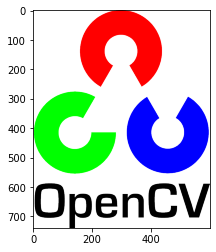

In [5]:
img = plt.imread('opencv-logo.png')
plt.imshow(img)

### Access and understand pixel data

In [5]:
img = cv2.imread("opencv-logo.png",1) # 1 to indicate we want to read all the color channels B,G,R and 0 for grayscale 
print(type(img),len(img), len(img[0]),len(img[0][0])) 

<class 'numpy.ndarray'> 739 600 3


This shows that this image is read as a numpy array with 739 rows and 600 columns since len reads the number of rows of an array. The number 3 is the number of channels in the image which corresponds to the R,G,B channels

A better way to find the shape of the numpy array would be to use img.shape, and the data type indicates if its uint8, uin16 etc. Here it is uint8, which is the unsigned integer of 8 bits with a range [0,255]

In [9]:
print(img.shape, img.dtype)

(739, 600, 3) uint8


To find the pixel values at a certain location you can just pass in the rows and columns


In [12]:
img[10][90]

array([255, 255, 255], dtype=uint8)

If you want to see the pixels in one channel:

In [13]:
img[10][90][1]

255

To find the total no. of pixels contained in the image you can use img.size

In [15]:
img.size

1330200

## Data Types and Structures

If we want to show a black image, we can just input all zeros into a numpy array using the np.zeros function. 
First, we declare the size of the numpy array [rows][cols][no. of channels]. Since we only want black we can show a grayscale image and only use one channel. 

Since we are using uint8, either 0 or 1 will be output black. If we increase the number in the pixel values then we can get lighter colors, with 255 being white

In [ ]:

cv2.imshow("Black",black)
print(black[0,0,:]) # : is to indicate all the values at the [0,0] location

ones = np.ones([150,200,3],'uint8')
cv2.imshow("Ones",ones)
print(ones[0,0,:])

white = np.ones([150,200,3],'uint16')
white *= (2**16-1)
cv2.imshow("White",white)
print(white[0,0,:])


color = ones.copy() # Note: .copy() is a deep copy copying all the elements and is not related to the original numpy array
color[:,:] = (255,0,0) # Numpy color is organized into [B,G,R], so this would result in a blue picture
cv2.imshow("Color",color)
print(color[0,0,:])

cv2.waitKey(0)
cv2.destroyAllWindows()

[0]
[1 1 1]
[65535 65535 65535]
[255   0   0]


### Image types and color channels

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Color')

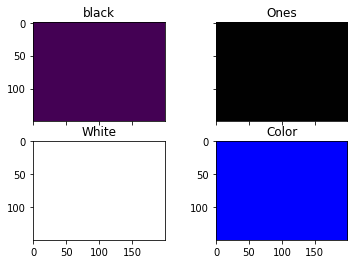

In [11]:
black = np.zeros([150,200,1],'uint8')
ones = np.ones([150,200,3],'uint8')
white = np.ones([150,200,3],'uint16')
white *= (2**16-1)

color = ones.copy() 
color[:,:] = (0,0,255) # Matplotlib has the format (r,g,b)

fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
imgplot1 = plt.imshow(black)
ax.set_title('black') #black in matplot lib plots it purple
ax.label_outer()

ax = fig.add_subplot(2, 2, 2)
imgplot2 = plt.imshow(ones)
ax.set_title('Ones')
ax.label_outer()

ax = fig.add_subplot(2, 2, 3)
imgplot3 = plt.imshow(white)
ax.set_title('White')

ax = fig.add_subplot(2, 2, 4)
imgplot4 = plt.imshow(color)
ax.set_title('Color')


In [5]:
# color = cv2.imread("butterfly.jpg",0)
# cv2.namedWindow("Color",cv2.WINDOW_NORMAL)
# cv2.imshow("Color",color)
# cv2.waitKey(0)

-1

In [ ]:
color = cv2.imread("butterfly.jpg",1)
 # It will place the window in the top-left hand corner 
cv2.imshow("Color",color)
cv2.moveWindow("Color",0,0)
print(color.shape)
height,width,channels = color.shape

b,g,r = cv2.split(color) # Will the numpy array into each of its individual matrices
# width*3 - To show the three different color channels individually in one window
rgb_split = np.empty([height,width*3,3],'uint8') 

rgb_split[:,0:width] = cv2.merge([b,b,b]) # Blue channel on the left
rgb_split[:,width:width*2] = cv2.merge([g,g,g]) # Green channel on the middle
rgb_split[:,width*2:width*3] = cv2.merge([r,r,r]) # Red channel on the right

cv2.imshow("RGBChannels",rgb_split)
cv2.moveWindow("RGBChannels",0,height)

cv2.waitKey(0)
cv2.destroyAllWindows()




(356, 493, 3)


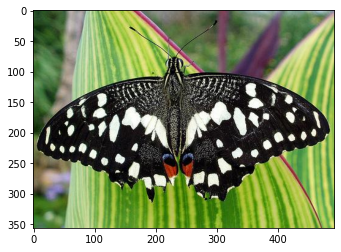

In [16]:
img = plt.imread('butterfly.jpg')
plt.imshow(img)

![](pics/bffly_channels.png)

For color conversion, we use the function cv2.cvtColor(input_image, flag) where flag determines the type of conversion.
For BGR to Gray conversion we use the flags cv2.COLOR_BGR2GRAY. Similarly for BGR to HSV, we use the flag cv2.COLOR_BGR2HSV. To see all the types of conversions available you can execute the code below. 

For HSV, Hue range is [0,179], Saturation range is [0,255] and Value range is [0,255]. Where 
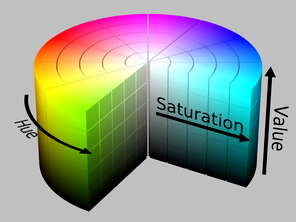


Red falls between 0 and 30 degrees.

Yellow falls between 31 and 60 degrees.

Green falls between 61 and 90 degrees.

Cyan falls between 91 and 120 degrees.

Blue falls between 121 and 150 degrees.

Magenta falls between 151 and 179 degrees.


In [5]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print (flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

In [3]:
color = cv2.imread("butterfly.jpg",1)
hsv = cv2.cvtColor(color, cv2.COLOR_BGR2HSV )
h,s,v = cv2.split(hsv)
hsv_split = np.concatenate((h,s,v),axis=1)
cv2.imshow("SPLIT HSV",hsv_split)

cv2.waitKey(0)
cv2.destroyAllWindows()

![](pics/hsv_bffly.png)

This shows the hue(left picture), where the leaves are all the same color. So if we want to isolate the leaves, the hue will be useful 

### Pixel manipulation and filtering

In [6]:
color = cv2.imread("butterfly.jpg",1)
gray = cv2.cvtColor(color, cv2.COLOR_BGR2GRAY)
cv2.imwrite('pics\gray.jpg',gray)

True

![](pics/gray.jpg)

Adding an additional channel to an image already loaded. The 4th channel will be added for transparency otherwise known as alpha channel. First, let obtain each individual color in its own numpy array. We use numpy slicing, because it is much faster than cv2.split() 

In [8]:
b = color[:,:,0]
g= color[:,:,1]
r = color[:,:,2]

The 4th channel is our transparency layer. For example, if we want the non-green parts of the image transparent we can pass in the g channel as the 4th layer

In [14]:
# The 4th channel is our transparency layer. For example, if we want the non-green parts of the image transparent 
# we can pass in the g channel as the 4th layer
rgba = cv2.merge((b,g,r,g))
cv2.imwrite("pics/rgba.png",rgba) # png because jpg images do not support transparency where it will not be converted into a 3 channel image

True

![](pics/rgba.png)

### Gaussian Blur, dilation, and erosion

Gaussian blur, smoothes images by averaging pixel values over its neighbors. Used to smooth out noise in an image. The kernel filter has to be odd, while you can also input the standard deviation oin X and Y directions. If 0 for StdX then it will the same for stdY. 

In [3]:
img = cv2.imread('thresh.jpg')
cv2.imshow("Original",img)
# structuring element by how much we should blur on each axis (x,y) where x and y have to be odd numbers
# because we have to specify the width and height of the kernel filter
blur = cv2.GaussianBlur(img,(5,55),0)
cv2.imshow("Gaussian Blur", blur)
cv2.imwrite('pics/gauss_blur.jpg',blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

![](thresh.jpg)![](pics/gauss_blur.jpg)


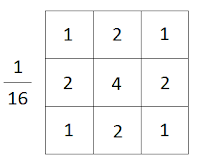
                                        3x3 Gaussian Kernel
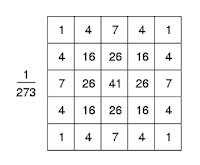
                                        5x5 Gaussian Kernel

Dilation and erosion 
![](pics/dilation.jpg)
![](pics/erosion.png)

In [7]:
img = cv2.imread('thresh.jpg')

kernel = np.ones((5,5),'uint8')

dilate = cv2.dilate(img,kernel,iterations=1)
erode = cv2.erode(img,kernel,iterations=1)

cv2.imshow("Dilate", dilate)
cv2.imshow("Erode", erode)


cv2.waitKey(0)
cv2.destroyAllWindows()

![](pics/dilate.png)

![](pics/erode.png)

They can be combined together to remove noise

### Scaling and Rotating Images

In [13]:
img = cv2.imread('players.jpg',1)
img_half = cv2.resize(img,(0,0),fx=0.5,fy=0.5) # (0,0) because we do not want to specify pixel dimensions
img_stretch = cv2.resize(img, (600,600))
img_stretch_near = cv2.resize(img, (600,600), interpolation = cv2.INTER_NEAREST)

# Scaling
cv2.imshow("Image",img)
cv2.imshow("Half",img_half)
cv2.imshow("Stretch",img_stretch)
cv2.imshow("Stretch Near",img_stretch_near)

# Rotation
M = cv2.getRotationMatrix2D((0,0),-30,1) # will rotate at the top left (0,0)
# M = cv2.getRotationMatrix2D((img.shape[1],img.shape[0]),-30,1) This will rotate from the bottom right
# M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1) - To rotate from the center
rotated = cv2.warpAffine(img, M, (img.shape[1],img.shape[0]))
cv2.imshow("Rotated",rotated)

cv2.waitKey(0)
cv2.destroyAllWindows()



![](pics/roation.png)
![](pics/rotate.png)

### Using Video Inputs

To capture a video, you need to create a VideoCapture object. Its argument can be either the device index or the name of a video file. Device index is just the number to specify which camera. Normally one camera will be connected (as in my case). So I simply pass 0 (or -1). You can select the second camera by passing 1 and so on. After that, you can capture frame-by-frame. But at the end, don’t forget to release the capture.

cap.read() returns a bool (True/False). If frame is read correctly, it will be True

In [15]:
cap = cv2.VideoCapture(0)

while(True):
    # To read from the video capture stream
    ret,frame = cap.read()
    frame = cv2.resize(frame,(0,0),fx=0.5,fy=0.5)
    cv2.imshow("Frame",frame)
    
    #register a waitkey so that we have an exit loop
    ch = cv2.waitKey(1) # This will run every 1ms
    
    if ch & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


### Create custom interfaces

We can now design our own real-time interfaces. We are going to be drawing a circle on the screen and place the circle based on where we last clicked. 


In [21]:
cap = cv2.VideoCapture(0)

# Defining a green color and assuming that the webcam has uint8 depth
color = (0,255,0)
line_width = 3 # if -1 then the circle would be filled instead of specifying the line thickness
radius = 100
point = (0,0)

# To capture mouse clicks we use a callback. This will run everytime you click the mouse on the video feed
def click(event,x,y,flags,param):
    global point, pressed
    
    # We will just use the call back to change the point of the coordinates
    if event == cv2.EVENT_LBUTTONDBLCLK:
        print('Pressed: {0},{1}'.format(x,y))
        point = (x,y)


# Final step, register the click with OpenCV handler
cv2.namedWindow("Frame")
cv2.setMouseCallback("Frame",click)
        
while(True):
    # To read from the video capture stream
    ret,frame = cap.read()
#     frame = cv2.resize(frame,(0,0),fx=0.5,fy=0.5)
    
    #to draw circle
    circle = cv2.circle(frame,point,radius,color,line_width)
    cv2.imshow("Frame",frame)
    
    #register a waitkey so that we have an exit loop
    ch = cv2.waitKey(1) # This will run every 1ms
    
    if ch & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

Pressed: 396,282
Pressed: 63,116
Pressed: 119,249
Pressed: 428,212
Pressed: 235,344
Pressed: 534,179


### Creating Drawing App

App must paint multiple circles onto a canvas and switch between two different cirlces

In [29]:
import numpy as np
import cv2

green = (0,255,0) # Green
black = (0,0,0) # Black
red = (0,0,255)
blue = (255,0,0)

line_width = 3 
radius = 3
pointg = (0,0)
pointb = (0,0)
pointr = (0,0)
pointbb = (0,0)
# Global variables
canvas = np.ones([500,500,3],'uint8')*255

# click callback
def click(event, x, y, flags, param):
    global canvas, pointg, pointb, pointr, pointbb
    if event == cv2.EVENT_LBUTTONDOWN:
        pointg = (x,y)
        print("LButton Down")
    elif event == cv2.EVENT_MOUSEMOVE:
        pointb = (x,y)
        print("Mouse Move")
    elif event == cv2.EVENT_RBUTTONDOWN:
        pointr = (x,y)
        print("RButton Down")
    elif event == cv2.EVENT_MBUTTONUP:
        pointbb = (x,y)
        print("LButton DBL Click")    

# window initialization and callback assignment
cv2.namedWindow("canvas")
cv2.setMouseCallback("canvas", click)

# Forever draw loop
while True:
    
    circle = cv2.circle(canvas,pointg,radius,green,line_width)
    circle1 = cv2.circle(canvas,pointb,radius,black,line_width)
    circle2 = cv2.circle(canvas,pointr,radius,red,line_width)
    circle3 = cv2.circle(canvas,pointbb,radius,blue,line_width)
    
    cv2.imshow("canvas",canvas)

    # key capture every 1ms
    ch = cv2.waitKey(1)
    if ch & 0xFF == ord('q'):
        break


cv2.destroyAllWindows()

Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move

LButton DBL Click
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
LButton DBL Click
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse M

Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move

Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move
Mouse Move

In [1]:
import numpy as np
import cv2

# Global variables
canvas = np.ones([500,500,3],'uint8')*255
radius = 3
color = (0,255,0)
pressed = False # To grag the mouse and draw when pressed

# click callback
def click(event, x, y, flags, param):
    global canvas, pressed
    if event == cv2.EVENT_LBUTTONDOWN:
        pressed = True
#         print(param,flags)
        cv2.circle(canvas,(x,y),radius,color,-1)
    elif event == cv2.EVENT_MOUSEMOVE and pressed == True:
        cv2.circle(canvas,(x,y),radius,color,-1)
    elif event == cv2.EVENT_LBUTTONUP:
        pressed = False

# window initialization and callback assignment
cv2.namedWindow("canvas")
cv2.setMouseCallback("canvas", click)

# Forever draw loop
while True:

    cv2.imshow("canvas",canvas)

    # key capture every 1ms
    ch = cv2.waitKey(1)
    if ch & 0xFF == ord('q'):
        break
    elif ch & 0xFF == ord('b'):
        color = (255,0,0)
    elif ch & 0xFF == ord('g'):
        color = (0,255,0)
    elif ch & 0xFF == ord('r'):
        color = (0,0,255)

cv2.destroyAllWindows()

## Object Detection


### Segmentation and Binary Images

Segmenation is one of the way to identify objects and a typical output is a binary image. A 1 is something we want to use. One of the ways to get a binary image is to use a thresholding algorithm 
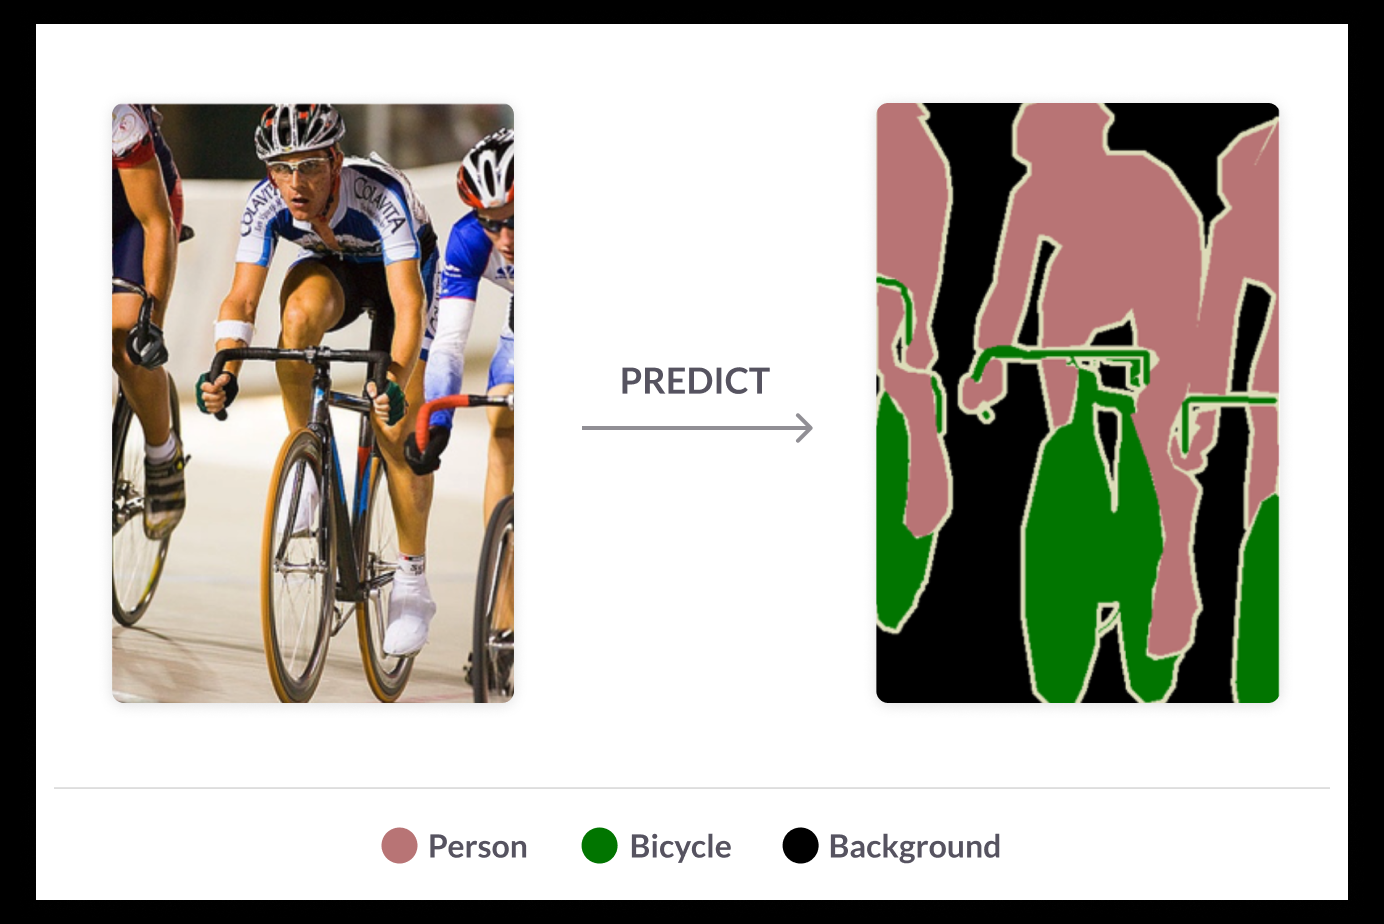

In [ ]:
import cv2 
import numpy as np

bw = cv2.imread('detect_blob.png',0)
height,width = bw.shape
cv2.imshow("Original BW", bw)


# Assigning all the objects in the image 1 and the rest 0
binary = np.zeros([height,width,1],'uint8') # 1 to indicate 1 channel image
threshold = 75 # Assumption in [0,255]

for row in range(0,height):
    for col in range(0,width):
        if bw[row][col]>threshold:
            binary[row][col] = 255 # We use 255 because we want to display white due to the GUI requirements

cv2.imshow("Slow Binary",binary)


# OpenCV has a much faster method than the nested for loop example above
ret, threshold = cv2.threshold(bw,threshold,255,cv2.THRESH_BINARY)
cv2.imshow("CV Thresh",threshold)


cv2.waitKey(0)
cv2.destroyAllWindows()

![](detect_blob.png)
![](pics/thresh_bw.png)

We can see that some of the objects are not fully represented and one oval shape is missing. This is because of the threshold as we converted the pixels that were above the threshold. 

### Adaptive Thresholding

Simple Binary Thresholding will not work for unevent lighting conditions to segment objects. Therefore, we have to resort to adaptive thresholding. This increases the versatility of image thresholding options. 

In [4]:
import cv2
import numpy as np

img = cv2.imread("sudoku.png",0)
cv2.imshow("Original Sudokuu",img)
# (img,threshold_value,max_value_in_img,style_of_thresholding)
ret,thresh = cv2.threshold(img,70,255,cv2.THRESH_BINARY)
cv2.imshow("Basic Binary",thresh)

cv2.waitKey(0)
cv2.destroyAllWindows()

![](sudoku.png)
![](pics/basic_bw.png)

We will have to use adaptive thresholding if we want to see all the lines in sudoku

In [5]:
# Neightborhood parameter indicating what the localize what the adaptive thresholding will act over
# 1 -It is just a constant which is subtracted from the mean or weighted mean calculated.
thres_adapt = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,115,1)
cv2.imshow("Adaptive Threshold",thres_adapt)
cv2.waitKey(0)
cv2.destroyAllWindows()

![](pics/adap_thres.png)

There are still some speckles, so if we want we can use erosion and dilation to make it better

### Skin Detection 

Detect and segment skin tones from an image. This will also cover composite filtering if no single threshold will work on it's own. 

In [3]:
import cv2
import numpy as np

img = cv2.imread('faces.jpeg',1)
img = cv2.resize(img,(0,0),fx=0.17,fy=0.17)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV )
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

# displaying channels
hsv_split = np.concatenate([h,s,v],axis=1)
cv2.imshow("Split HSV",hsv_split)
cv2.waitKey(0)
cv2.destroyAllWindows()

![](pics/faces_hsv.png)

Hue - A circular paramter, red either low 0 or very high 255. Blue and green are in between representing as the more gray values

Based on the pic. Doing a combination of filtering with the hue and saturation will give the best results



This includes bitwise AND, OR, NOT and XOR operations. They will be highly useful while extracting any part of the image 

In [6]:
# Thresholding for saturation. Values higher than 40 will appear white
ret, min_sat = cv2.threshold(s,40,255,cv2.THRESH_BINARY) 
cv2.imshow("Sat Filter",min_sat)

# Thresholding for hue. 
ret,max_hue = cv2.threshold(h,15,255,cv2.THRESH_BINARY_INV)
cv2.imshow("Hue Filter",max_hue)

final = cv2.bitwise_and(min_sat,max_hue)
cv2.imshow("Final",final)

cv2.waitKey(0)
cv2.destroyAllWindows()

![](pics/sat_filter.png)
![](pics/hue_filter.png)
![](pics/final_filter.png)

### Contours

Once yo uhave identified the segmented areas of the images, the next step is to identify the individual objects. We can use OpenCv implementation of contours.  

The goal of contours is to take a binary image and create a tightly fitting closed perimeter around all individual objects in the scene. Each perimeter is called a contour. From a mathematical point of view, it is called an iterative energy reduction algorithm. But conceptually, we can think of it as an elastic film that starts on the edges of an image and squeezes in around all the objects and shapes. It creates the boundary around all these objects. 

One thing to be aware of is the idea of neighborhoods and connectedness. Contours will consider any pixel value above zero as part of the foreground, and any other pixels touching or connected to this pixel will be made to be part of the same object. As the algorithm runs, it tries to reduce the energy or the bounding box around all these objects until it comes to a converged result. It's important to understand that while this may be an iterative algorithm, we know contours will always converge, so it'll never be stuck in an infinite loop. 

At the end, you have a list of contours, and each contour is simply a linear list of points which describe the perimeter of a single object. They are always enclosed, a technical term meaning there are no gaps. This means they can be safely drawn back onto an image and completely filled with a new color. 

Contours is one of the gateways to determine many other useful properties about a single object within an image, making it a very powerful algorithm at our image processing disposal. It moves from the step of object segmentation, often done by thresholding, into the step of object detection. 

- For better accuracy, use binary images. So before finding contours, apply threshold or canny edge detection.

- findContours function modifies the source image. So if you want source image even after finding contours, already store it to some other variables.

- In OpenCV, finding contours is like finding white object from black background. So remember, object to be found should be white and background should be black.

**To draw the contours**, cv2.drawContours function is used. It can also be used to draw any shape provided you have its boundary points. Its first argument is source image, second argument is the contours which should be passed as a Python list, third argument is index of contours (useful when drawing individual contour. To draw all contours, pass -1) and remaining arguments are color, thickness etc.

In [1]:
import cv2
import numpy as np

img = cv2.imread('detect_blob.png',1)
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
# 115 indicates the area over which adaptive thresholding will apply
thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,115,1)

cv2.imshow("Binary Adaptive Thresholding",thresh)

# contours is the actual individual list of contours (where each contour is a list of point which is a perimeter of an object)
# hierarchy is a parent-child relationship of all the contours, where a child would be if one contour is enclosed by another
contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

img2 = img.copy()
index = -1 #  index of the contour we want to draw and in this case, using an index value of minus one, we'll draw all the contours.
thickness = 4 # all the contours will be drawn with a thickness of 4
color = (255,0,255) #contours outlined with pink
cv2.drawContours(img2,contours,index,color,thickness)

cv2.imshow('Contours', img2) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 

![](pics/binary_adapt_thresh.png)
![](pics/contours_thresh.png)

Above, we see that contours are the boundaries of a shape with the same intensity. It stores the (x, y) coordinates of the boundary of a shape.If we pass cv2.CHAIN_APPROX_NONE, all the boundary points are stored.We need just two endpoints of that line. This is what cv2.CHAIN_APPROX_SIMPLE does. It removes all redundant points and compresses the contour, thereby saving memory.

Although there are a few artifacts where the adaptive threshold actually tried to outline areas in black. A common secondary step after running contour is to filter through and only look at a contour you need to use. To do this, it's often useful to look at various parameters and information that you can get from a single contour. 

### Area, perimeter and centroids of objects

Let's extract more information from each of these objects

In [4]:
import cv2
import numpy as np

img = cv2.imread('detect_blob.png',1)
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
# 115 indicates the area over which adaptive thresholding will apply
thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,115,1)

cv2.imshow("Binary Adaptive Thresholding",thresh)

# contours is the actual individual list of contours (where each contour is a list of point which is a perimeter of an object)
# hierarchy is a parent-child relationship of all the contours, where a child would be if one contour is enclosed by another
contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

img2 = img.copy()
index = -1 #  index of the contour we want to draw and in this case, using an index value of minus one, we'll draw all the contours.
thickness = 4 # all the contours will be drawn with a thickness of 4
color = (255,0,) #contours outlined with blue

objects = np.zeros([img.shape[0],img.shape[1],3],'uint8')
for c in contours:
    cv2.drawContours(objects,[c],-1,color,-1) # -1 to indicate that we are going to completely fill these conotours with the color
    
    # be calculates is based on the number of pixels in the foreground and it does some interpolations around the edges. 
    # values are in pixel squared
    area = cv2.contourArea(c)
    perimeter = cv2.arcLength(c,True) # True to indicate that the arc is a closed loop because it is a closed contour
    
    # To draw centroid of contour - weighted center of the contour based on where the area of the pixels are. 
    # First, we calculate the moment of the contour
    M = cv2.moments(c)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    
    # To draw the centroid
    cv2.circle(objects,(cx,cy),4,(0,255,0),-1)
    
    print('Area: {0}, Perimeter: {1}'.format(area,perimeter))

cv2.imshow("Contours",objects)
    
cv2.waitKey(0) 
cv2.destroyAllWindows() 

Area: 86.5, Perimeter: 45.55634891986847
Area: 959.5, Perimeter: 251.8406196832657
Area: 13091.5, Perimeter: 754.0416301488876
Area: 10069.5, Perimeter: 401.41421353816986
Area: 7780.0, Perimeter: 329.22034430503845
Area: 4160.0, Perimeter: 258.0
Area: 1672.0, Perimeter: 160.48528122901917
Area: 14515.0, Perimeter: 1225.768675327301
Area: 6357.0, Perimeter: 446.9116872549057
Area: 7718.0, Perimeter: 484.8284270763397
Area: 4592.5, Perimeter: 502.0315263271332
Area: 5014.0, Perimeter: 357.2792183160782
Area: 5019.0, Perimeter: 444.3675308227539
Area: 8829.0, Perimeter: 450.5929263830185
Area: 108.0, Perimeter: 41.79898953437805
Area: 551.5, Perimeter: 93.41421353816986
Area: 2707.5, Perimeter: 194.75230765342712
Area: 1644.5, Perimeter: 152.1248904466629
Area: 767.0, Perimeter: 105.74011433124542
Area: 3501.5, Perimeter: 251.0710676908493
Area: 8556.0, Perimeter: 345.70562493801117
Area: 8868.0, Perimeter: 378.8284270763397
Area: 865.0, Perimeter: 185.4558435678482
Area: 1482.0, Perimet

![](pics/contours_centroid.png)

The areas and perimeters have all been printed out. This information could be collected and categorized to build a sort of classifier for each of the contours or objects found. This could even be used as a way to detect if objects are the same or similar. There's many other types of information you could collect from a contour such as the contour's circularity or orientation. All of these can be useful pieces of information to know about a contour for further classification. 

### Canny Edge Detection 

Often we need to pre-process images in order to improve our final result, and in the case of extracting contours from individual objects in an image it is often handy to first detect and accentuate the edges within an image. Canny Edges is one type of edge detection algorithm that works quite well to help create better separation of objects within the image. 

Generally speaking, edge detection algorithms look at the rate or speed at which color changes across the image. Canny Edges is a specific form of that algorithm that creates a single pixel wide line at key high gradient areas in the image. This can help break up the object if there was an overlap in our segmentation process. 

Imagine the goal here is to try and segment out each individual tomato. If we're running a threshold, we may run into an issue where the different tomatoes get blobbed together as one single object. 

The Canny edge detection algorithm is composed of 5 steps:

    1.Noise reduction;
    2.Gradient calculation;
    3.Non-maximum suppression;
    4.Double threshold;
    5.Edge Tracking by Hysteresis.

In [5]:
import cv2
import numpy as np

img = cv2.imread('tomatoes.jpg')
cv2.imshow("Tomatoes",img)

hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
# hue values are around red between 0 and 25 and 250-255
res,thresh = cv2.threshold(hsv[:,:,0],25,255,cv2.THRESH_BINARY_INV)
cv2.imshow("Thresh",thresh)

edges = cv2.Canny(img,100,70) # we need to give the lower and upper limit of the threshold
cv2.imshow("Canny",edges)

cv2.waitKey(0)
cv2.destroyAllWindows()

![](tomatoes.jpg)
![](pics/tomatoes_thresh.png)

The threshold image looks like it has combined the large three tomatoes in the foreground into one object. You can see that the overlap of the threshold would mean that contours would see this as only one object when in fact it should be multiple. This is where Canny Edges can help us break it up.

![](pics/tomatoes_canny.png)

**Task:**
Segment the objects, draw them on a blank page and print the perimeter and area. Only print the objects that have an area greater than 1000 px^2. Each object needs to be draw on its own color. 

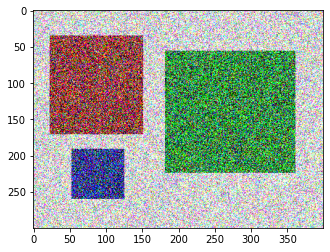

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

plt.imshow(plt.imread('fuzzy.png'))

In [1]:
import cv2 
import numpy as np
import random

img = cv2.imread('fuzzy.png')
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
cv2.imshow("Gray",gray)
blur = cv2.GaussianBlur(gray,(15,15),0)
cv2.imshow("Blur",blur)


ret,thresh = cv2.threshold(blur,135,255,cv2.THRESH_BINARY)
cv2.imshow("Binary Thresholding",thresh)
# 115 indicates the area over which adaptive thresholding will apply
# thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,115,1)
# cv2.imshow("Binary Adaptive Thresholding",thresh)


canvas = np.ones([img.shape[0],img.shape[1],3],'uint8')*255


# contours is the actual individual list of contours (where each contour is a list of point which is a perimeter of an object)
# hierarchy is a parent-child relationship of all the contours, where a child would be if one contour is enclosed by another


img2 = img.copy()
index = -1 #  index of the contour we want to draw and in this case, using an index value of minus one, we'll draw all the contours.

color = [(255,0,255),(255,0,0),(0,255,0),(0,0,255)] 
# cv2.drawContours(img2,contours,index,color,thickness)

contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

for index,c in enumerate(contours):
     # -1 to indicate that we are going to completely fill these conotours with the color
    col = (random.randint(0,255), random.randint(0,255), random.randint(0,255))
    # be calculates is based on the number of pixels in the foreground and it does some interpolations around the edges. 
    # values are in pixel squared
    area = cv2.contourArea(c)
    perimeter = cv2.arcLength(c,True) # True to indicate that the arc is a closed loop because it is a closed contour
#     if 1000 < area < 100000:
    if area >1000:
      # drawing all and filling in the color
        cv2.drawContours(canvas,[c],-1,col,-1)
        # To draw the centroid
#         cv2.circle(canvas,(cx,cy),4,(0,255,0),-1)

        print('Area: {0}, Perimeter: {1}'.format(area,perimeter))

cv2.imshow("Contours",canvas)

cv2.waitKey(0)
cv2.destroyAllWindows()

Area: 119301.0, Perimeter: 1396.0
Area: 4930.0, Perimeter: 280.7695517539978
Area: 29325.0, Perimeter: 712.4507912397385
Area: 17642.5, Perimeter: 533.9827548265457


In [ ]:
import numpy as np
import cv2
import random

img = cv2.imread("fuzzy.png",1)
cv2.imshow("Original",img)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3),0)

thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 205, 1)
cv2.imshow("Binary",thresh)

contours,_= cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

filtered = []
for c in contours:
    if cv2.contourArea(c) < 1000:continue
    filtered.append(c)

print(len(filtered))

objects = np.zeros([img.shape[0],img.shape[1],3], 'uint8')
for c in filtered:
    col = (random.randint(0,255), random.randint(0,255), random.randint(0,255))
    cv2.drawContours(objects,[c], -1, col, -1)
    area = cv2.contourArea(c)
    p = cv2.arcLength(c,True)
    print(area,p)

cv2.imshow("Contours",objects)


cv2.waitKey(0)
cv2.destroyAllWindows()

2054
4
4926.0 298.2253956794739
29882.0 795.3868639469147
1038.0 645.0681030750275
17250.0 585.0782079696655


## Face and Feature Detection

A feature is any part of an image which can be used to understand an image better and to help perform a needed task. Features can be visual components of an image or more mathematical properties of the patterns and arrangement of the pixel values. Good features are invariant to changes like lighting or scaling.

For example, with faces, you first might detect whether a face exists in an image, and a follow-up step might be to understand if that face matches any image in a database. In this case, features such as the distance between eyes in an image may be used both for the detection process to see whether or not a face actually exists, but also used as a classifier for the recognition process to see which face it specifically matches with. 

### Template Matching

The way template matching works, is it searches for a similar pattern between two images. This is accomplished by taking a reference image, called a template and sliding it around the other comparison image, taking a difference at every position. The result, is a black and white gray scale image with varying intensities showing how well it matched at each position.  

This difference shows us how close those two images are together and if there are any close matches between the template and the source frame it will indicate that area as a very bright spot in the resulting image.

Typically with template matching you don't actually use an element from the source image yourself but something that is predetermined, such as a face or a known generic object that is expected to be found in the scene. 
 
If your template is scaled compared to your Source image then it will not work very well, likewise if your template is rotated and the template looks different at those different rotations, it may reduce the effectiveness of the template matching. 

More can be found here: https://docs.opencv.org/master/d4/dc6/tutorial_py_template_matching.html
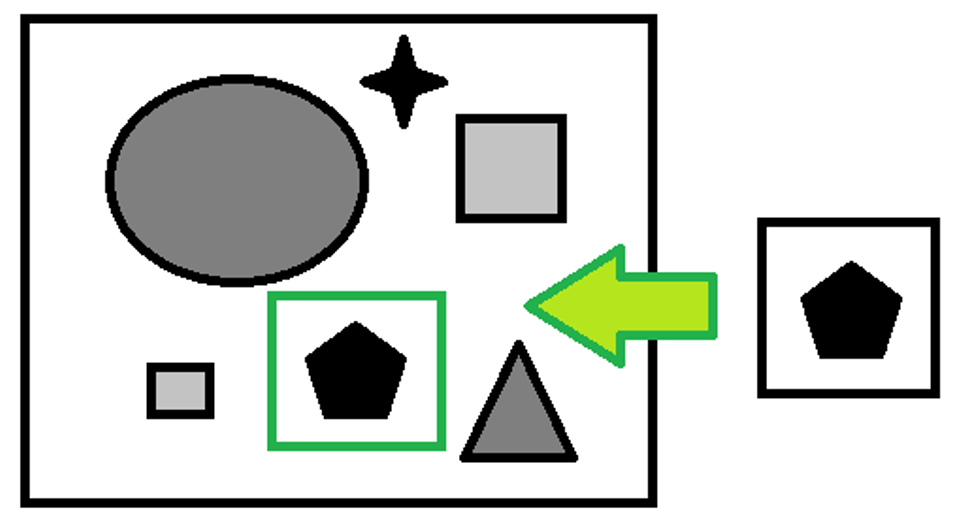


In [2]:
import cv2
import numpy as np

template = cv2.imread('template.jpg',0)
frame = cv2.imread('players.jpg',0)

result = cv2.matchTemplate(frame,template,cv2.TM_CCOEFF_NORMED)
cv2.imshow("Matched Template",result)

# Trying to draw the matched template by obtaining the location of the point with the highest brightness
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
print(max_val,max_loc)
cv2.circle(result,max_loc,15,255,2)
cv2.imshow("Result",result)
cv2.waitKey(0)
cv2.destroyAllWindows()

0.4659745395183563 (132, 243)


![](template.jpg)
![](players.jpg)
![](pics/template_matching.png)

### Haar Cascading 

Haar Cascade is a machine learning object detection algorithm used to identify objects in an image or video. It is a machine learning based approach where a cascade function is trained from a lot of positive and negative images. It is then used to detect objects in other images. 

The algorithm has four stages:

    1.Haar Feature Selection
    2.Creating  Integral Images
    3.Adaboost Training
    4.Cascading Classifiers
    
More info here: http://www.willberger.org/cascade-haar-explained/
More info about haar features: https://medium.com/analytics-vidhya/what-is-haar-features-used-in-face-detection-a7e531c8332b

OpenCv's explanation (so far the best): https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html

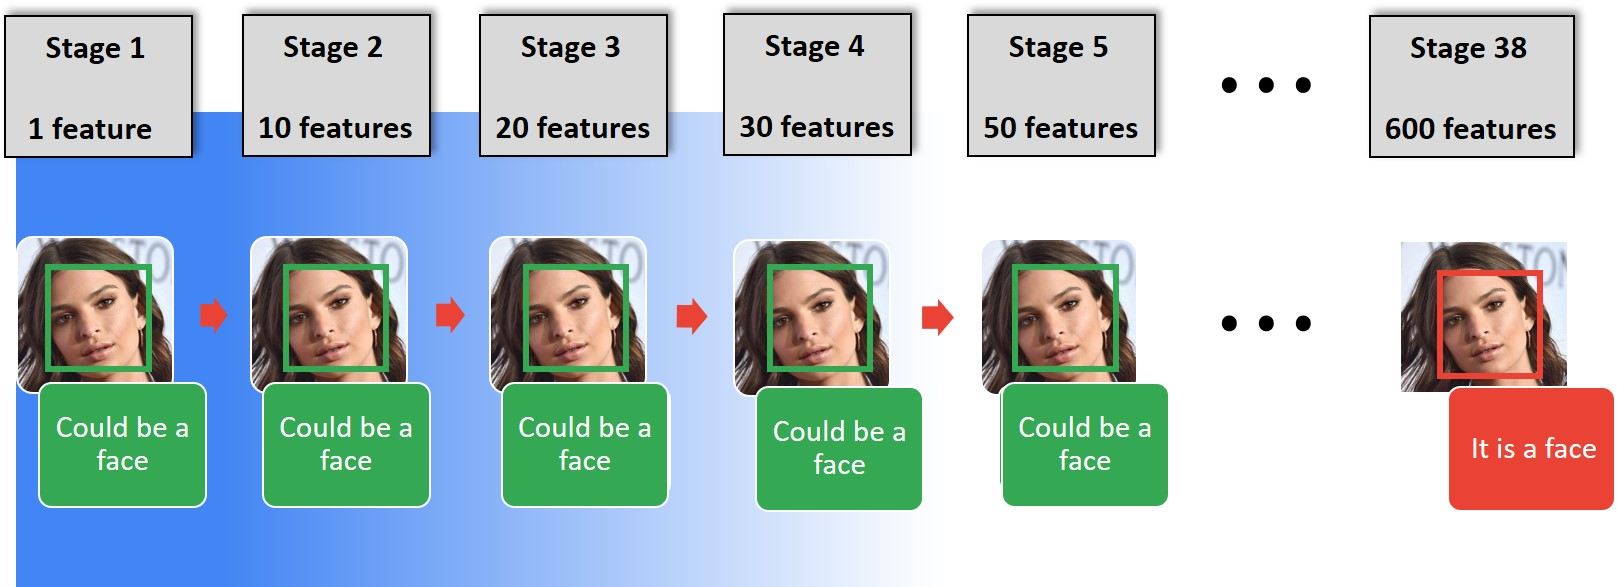

The whole point of haar cascades and why it is fast is because of the features as shown in the image above. For example, if the first stage has a feature is the detection of eyebrows,and the next feature has ears based on edge detections (using the haar features) this can go on to represent many stages of features. If the image for example does not pass a stage the algorithm can discard it immediately thereby saving time. The next important point is that haar cascades can be used to position to determine the most important features in the first few stages so it can work much faster. 

Haar cascades can also be used to detect cars, planes etc. The problem with haar cascades are that if you wear sunglasses or maybe tilt your head then haar cascades may not work properly. 

In [20]:
import numpy as np
import cv2

img = cv2.imread('faces_small.jpeg',1)
# img = cv2.resize(img,(0,0),fx=0.17,fy=0.17)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
path = 'Exercise Files/Ch04/04_05 Begin/haarcascade_frontalface_default.xml'
# load in xml file and intializes the cascades of functions and classifiers
face_cascade = cv2.CascadeClassifier(path) 
# scaleFactor = 1.05 and noting that this is a compensating factor for only wanting faces close to the camera;
# minNeighbors = 5 this factor sets a number of nearby object detections required before it's considered a face
# minSize = (40,40), is the actual minimum size of a face to count before it's detected 

# result of this operation is creating a list that contains all the bounding boxes for detected faces. 
# If there are no faces found in an image, the length of a list would be set as zero. 
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.15, minNeighbors=5,minSize=(40,40))
print(len(faces))

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
# img = cv2.resize(img, (960, 740))
cv2.imshow("Faces",img)

cv2.waitKey(0)
cv2.destroyAllWindows()


25


![](pics/face_detect.png)

Now let's detect eyes. We can use the ROI from the face detection and inside that region we can detect eyes. Because eyes exist only if there are faces LOL! 

In [32]:
import numpy as np
import cv2
import math

img = cv2.imread('faces_small.jpeg',1)
# img = cv2.resize(img,(0,0),fx=0.17,fy=0.17)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
path = 'Exercise Files/Ch04/04_05 Begin/haarcascade_frontalface_default.xml'
# load in xml file and intializes the cascades of functions and classifiers
face_cascade = cv2.CascadeClassifier(path) 
eye_cascade = cv2.CascadeClassifier('Exercise Files/Ch04/04_06 Begin/haarcascade_eye.xml')
# result of this operation is creating a list that contains all the bounding boxes for detected faces. 
# If there are no faces found in an image, the length of a list would be set as zero. 
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.15, minNeighbors=5,minSize=(40,40))
print(len(faces))

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        center_x = int((ex+(ex+ew))/2) 
        center_y = int((ey+(ey+eh))/2)
#         radius = int((math.sqrt(ew**2 + eh**2))/2)
        radius = int(ew/2)
        cv2.circle(roi_color,(center_x,center_y),radius,(255,0,0),2)
# img = cv2.resize(img, (960, 740))
cv2.imshow("Faces and eyes",img)

cv2.waitKey(0)
cv2.destroyAllWindows()


25


![](pics/face_eye.png)

image = cv2.circle(image, center_coordinates, radius, color, thickness)

In [34]:
import numpy as np
import cv2

img = cv2.imread("faces_small.jpeg",1)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
path = 'Exercise Files/Ch04/04_06 Begin/haarcascade_eye.xml'

eye_cascade = cv2.CascadeClassifier(path)

eyes = eye_cascade.detectMultiScale(gray, scaleFactor=1.02,minNeighbors=20,minSize=(10,10))
print(len(eyes))

for (x, y, w, h) in eyes:
    xc = (x + x+w)/2
    yc = (y + y+h)/2
    radius = w/2
    cv2.circle(img, (int(xc),int(yc)), int(radius), (255,0,0), 2)
cv2.imshow("Eyes",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

43


![](pics/eyes.png)